In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pulp

from scipy import stats
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import splrep, splev

In [429]:
df_demand = pd.read_csv("demands.csv")
df_demand

,Year,Region,Demand
0,2013,Downtown Toronto,249581
1,2013,East York,172730
2,2013,Etobicoke,285764
3,2013,Mississauga East,255427
4,2013,North Toronto,263276
...,...,...,...
65,2022,Etobicoke,445369
66,2022,Mississauga East,395768
67,2022,North Toronto,406148
68,2022,North York,494386


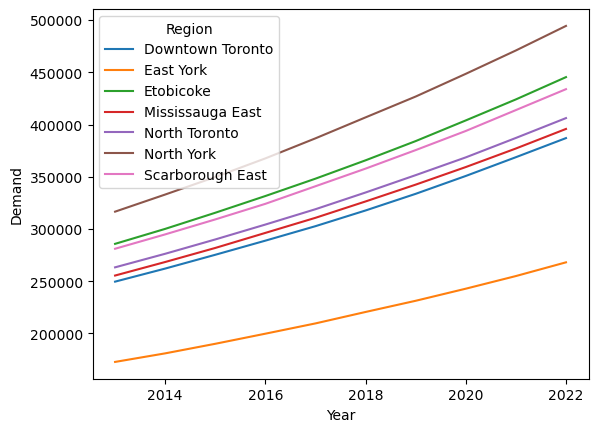

In [430]:
# Let's plot the demand
sns.lineplot(x="Year", y="Demand", hue='Region', data=df_demand)
plt.show()

In [431]:
df_demand_forecast = pd.DataFrame({'Year': [], 'Region':[], 'Demand_Forecast': []})

for region in df_demand['Region'].unique():
    spl = splrep(df_demand[df_demand['Region']==region]['Year'], df_demand[df_demand['Region']==region]['Demand'], k=2)
    future_index = np.arange(df_demand['Year'].min(), df_demand['Year'].max() + 4)
    future_predictions = splev(future_index, spl)
    num_yrs = df_demand['Year'].max() - df_demand['Year'].min() + 4
    new_df = pd.DataFrame({'Year': future_index, 'Region': [region]*num_yrs, 'Demand_Forecast': future_predictions})
    df_demand_forecast = df_demand_forecast.append(new_df, ignore_index=True)
    

C:\Users\ddjgy\AppData\Local\Temp\ipykernel_38432\8486167.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_demand_forecast = df_demand_forecast.append(new_df, ignore_index=True)


In [432]:
df_demand_forecast = pd.merge(df_demand_forecast, df_demand, on=['Year', 'Region'], how='left')
df_demand_forecast['Diff'] = df_demand_forecast['Demand_Forecast'] - df_demand_forecast['Demand']
df_demand_forecast.sample(10)

,Year,Region,Demand_Forecast,Demand,Diff
89,2024.0,Scarborough East,473011.455577,NaN,NaN
73,2021.0,North York,470890.000000,470890.0,0.000000e+00
8,2021.0,Downtown Toronto,368710.000000,368710.0,5.820766e-11
45,2019.0,Mississauga East,342453.000000,342453.0,0.000000e+00
58,2019.0,North Toronto,351541.000000,351541.0,0.000000e+00
17,2017.0,East York,209598.000000,209598.0,-2.910383e-11
40,2014.0,Mississauga East,268385.000000,268385.0,0.000000e+00
88,2023.0,Scarborough East,453575.151859,NaN,NaN
23,2023.0,East York,282352.169717,NaN,NaN
56,2017.0,North Toronto,318926.000000,318926.0,-5.820766e-11


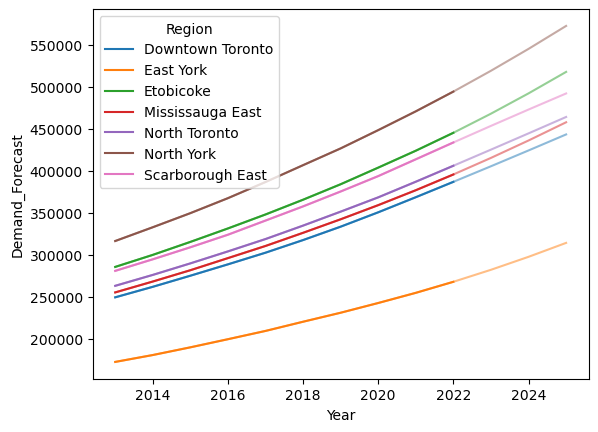

In [433]:
# Let's plot the demand
sns.lineplot(x="Year", y="Demand_Forecast", hue='Region', data=df_demand_forecast, alpha=0.5)
sns.lineplot(x="Year", y="Demand", hue='Region', data=df_demand_forecast, legend=False)
plt.show()

In [434]:
df_demand_forecast['Year'] = df_demand_forecast['Year'].astype(int)

In [435]:
df_forecast = df_demand_forecast[(df_demand_forecast['Year'] <2026) & (df_demand_forecast['Year'] > 2021) ].copy(deep=True)
df_forecast.head()

,Year,Region,Demand_Forecast,Demand,Diff
9,2022,Downtown Toronto,387003.000000,387003.0,0.0
10,2023,Downtown Toronto,405549.172363,NaN,NaN
11,2024,Downtown Toronto,424348.517089,NaN,NaN
12,2025,Downtown Toronto,443401.034178,NaN,NaN
22,2022,East York,268068.000000,268068.0,0.0


In [436]:
df_center_num = pd.DataFrame({'Center':['Center A', 'Center B', 'Center C', 'Center D', 'Center E','Center F'],
                             'center_num': list(range(1, 7))})
df_center_num

,Center,center_num
0,Center A,1
1,Center B,2
2,Center C,3
3,Center D,4
4,Center E,5
5,Center F,6


In [437]:
df_region_num = pd.DataFrame({'Region':['Downtown Toronto', 'East York', 'Etobicoke', 'Mississauga East', 
                                        'North Toronto', 'North York', 'Scarborough East'],
                             'region_num': list(range(1, 8))})
df_region_num

,Region,region_num
0,Downtown Toronto,1
1,East York,2
2,Etobicoke,3
3,Mississauga East,4
4,North Toronto,5
5,North York,6
6,Scarborough East,7


In [438]:
df_forecast = pd.merge(df_forecast, df_region_num, on='Region', how='left')
df_forecast.head()

,Year,Region,Demand_Forecast,Demand,Diff,region_num
0,2022,Downtown Toronto,387003.000000,387003.0,0.0,1
1,2023,Downtown Toronto,405549.172363,NaN,NaN,1
2,2024,Downtown Toronto,424348.517089,NaN,NaN,1
3,2025,Downtown Toronto,443401.034178,NaN,NaN,1
4,2022,East York,268068.000000,268068.0,0.0,2


In [439]:
df_forecast['Year'] = 2025-df_forecast['Year']
df_forecast['Year'] = 3-df_forecast['Year']
df_forecast.set_index("Year", inplace = True)
df_forecast.head()

,Region,Demand_Forecast,Demand,Diff,region_num
Year,,,,,
0,Downtown Toronto,387003.000000,387003.0,0.0,1
1,Downtown Toronto,405549.172363,NaN,NaN,1
2,Downtown Toronto,424348.517089,NaN,NaN,1
3,Downtown Toronto,443401.034178,NaN,NaN,1
0,East York,268068.000000,268068.0,0.0,2


In [440]:
df_distances = pd.read_csv("distances.csv")
df_distances.head()

,Center,Region,Distance
0,Center A,Downtown Toronto,25.77
1,Center A,East York,2.24
2,Center A,Etobicoke,25.72
3,Center A,Mississauga East,28.65
4,Center A,North Toronto,11.64


In [441]:
df_distances = pd.merge(df_distances, df_region_num, on=['Region'], how='left')
df_distances.head()

,Center,Region,Distance,region_num
0,Center A,Downtown Toronto,25.77,1
1,Center A,East York,2.24,2
2,Center A,Etobicoke,25.72,3
3,Center A,Mississauga East,28.65,4
4,Center A,North Toronto,11.64,5


In [442]:
df_distances = pd.merge(df_distances, df_center_num, on=['Center'], how='left')
df_distances.head()

,Center,Region,Distance,region_num,center_num
0,Center A,Downtown Toronto,25.77,1,1
1,Center A,East York,2.24,2,1
2,Center A,Etobicoke,25.72,3,1
3,Center A,Mississauga East,28.65,4,1
4,Center A,North Toronto,11.64,5,1


In [443]:
df_centers = pd.read_csv("centers.csv")
df_centers

,Center,Opening Costs,Operating Costs,Num MPs,Maximum capacity
0,Center A,0,275000,215,5000000
1,Center B,0,275000,125,5000000
2,Center C,0,275000,100,5000000
3,Center D,0,285000,120,5000000
4,Center E,250000,125000,0,5000000
5,Center F,100000,175000,0,5000000


In [444]:
df_centers = pd.merge(df_centers, df_center_num, on=['Center'], how='left')
df_centers.head()

,Center,Opening Costs,Operating Costs,Num MPs,Maximum capacity,center_num
0,Center A,0,275000,215,5000000,1
1,Center B,0,275000,125,5000000,2
2,Center C,0,275000,100,5000000,3
3,Center D,0,285000,120,5000000,4
4,Center E,250000,125000,0,5000000,5


In [445]:
df_centers.set_index('center_num', inplace=True)
df_centers

,Center,Opening Costs,Operating Costs,Num MPs,Maximum capacity
center_num,,,,,
1,Center A,0,275000,215,5000000
2,Center B,0,275000,125,5000000
3,Center C,0,275000,100,5000000
4,Center D,0,285000,120,5000000
5,Center E,250000,125000,0,5000000
6,Center F,100000,175000,0,5000000


In [446]:
df_distances.head(8)

,Center,Region,Distance,region_num,center_num
0,Center A,Downtown Toronto,25.77,1,1
1,Center A,East York,2.24,2,1
2,Center A,Etobicoke,25.72,3,1
3,Center A,Mississauga East,28.65,4,1
4,Center A,North Toronto,11.64,5,1
5,Center A,North York,0.00,6,1
6,Center A,Scarborough East,19.76,7,1
7,Center B,Downtown Toronto,29.88,1,2


In [447]:
df_forecast.head(8)

,Region,Demand_Forecast,Demand,Diff,region_num
Year,,,,,
0,Downtown Toronto,387003.000000,387003.0,0.0,1
1,Downtown Toronto,405549.172363,NaN,NaN,1
2,Downtown Toronto,424348.517089,NaN,NaN,1
3,Downtown Toronto,443401.034178,NaN,NaN,1
0,East York,268068.000000,268068.0,0.0,2
1,East York,282352.169717,NaN,NaN,2
2,East York,297783.509150,NaN,NaN,2
3,East York,314362.018300,NaN,NaN,2


In [483]:
df_forecast[df_forecast.index==1]['Demand_Forecast'].sum()

2969550.9200521605

### Sets

In [484]:
# Centers
centers = list(df_centers.index)
num_centers = len(centers)

# Regions
regions = list(df_forecast["region_num"].unique())
num_regions = len(regions)

# Years
years = list(df_forecast.index.unique())
num_years = len(years)

### Parameters

In [485]:
c_to_r_distance

{(1, 1): 25.77,
 (1, 2): 2.24,
 (1, 3): 25.72,
 (1, 4): 28.65,
 (1, 5): 11.64,
 (1, 6): 0.0,
 (1, 7): 19.76,
 (2, 1): 29.88,
 (2, 2): 16.04,
 (2, 3): 31.11,
 (2, 4): 33.93,
 (2, 5): 25.05,
 (2, 6): 22.98,
 (2, 7): 0.0,
 (3, 1): 19.1,
 (3, 2): 22.45,
 (3, 3): 26.93,
 (3, 4): 21.58,
 (3, 5): 22.99,
 (3, 6): 20.52,
 (3, 7): 14.86,
 (4, 1): 29.88,
 (4, 2): 16.04,
 (4, 3): 31.11,
 (4, 4): 0.0,
 (4, 5): 25.05,
 (4, 6): 22.98,
 (4, 7): 26.78,
 (5, 1): 6.37,
 (5, 2): 20.93,
 (5, 3): 23.2,
 (5, 4): 20.65,
 (5, 5): 0.0,
 (5, 6): 11.64,
 (5, 7): 25.89,
 (6, 1): 18.83,
 (6, 2): 30.7,
 (6, 3): 25.64,
 (6, 4): 0.0,
 (6, 5): 20.65,
 (6, 6): 28.65,
 (6, 7): 17.01}

In [486]:
# Demand in each region and year (dictionary)
region_demand = {}
for i in regions:
    for y in years:
        region_demand[(i,y)] = float(df_forecast[(df_forecast["region_num"] == i)].loc[y, "Demand_Forecast"])

In [487]:
# Center to region distances (dictionary)
c_to_r_distance = {}
for j in centers:
    for i in regions:
        c_to_r_distance[(j,i)] = float(df_distances[(df_distances["center_num"] == j) & 
                                                    (df_distances["region_num"] == i)]["Distance"])

In [488]:
center_operating_cost = {}
center_opening_cost = {}
center_capacity = {}
for j in centers:
    center_operating_cost[j] = float(df_centers.loc[j]["Operating Costs"])
    center_opening_cost[j] = float(df_centers.loc[j]["Opening Costs"])
    center_capacity[j] = int(df_centers.loc[j]["Maximum capacity"])

### Variables

In [489]:
# Work hour variables
xvar = pulp.LpVariable.dict("x", (centers, regions, years), lowBound=0.0, cat=pulp.LpContinuous)

# Variables: if a center is operating in year y
zvar = pulp.LpVariable.dict("z", (centers, years), cat=pulp.LpBinary)

# Variables: if a center is opened in year 1
Fvar = pulp.LpVariable.dict("F", centers, cat=pulp.LpBinary)

# Number of HPs in each center in each year
nvar = pulp.LpVariable.dict('n', (centers, years), lowBound=0, cat=pulp.LpInteger)

# Number of new HP hires in each center in each year
hvar = pulp.LpVariable.dict('h', (centers, years), lowBound=0, upBound = 300, cat=pulp.LpInteger)


### Model initialization


In [490]:
# Initialize model and objective sense
model = pulp.LpProblem(name="Comfor_Health", sense=pulp.LpMinimize)

### Constraints

In [491]:
# Contraint: demand must be satisfied for each region and year
for y in years[1:]:
    for i in regions:    
        model += pulp.lpSum( [xvar[(j,i,y)] for j in centers] ) <= region_demand[(i,y)]

In [492]:
# Contraint: the number of work hours cannot exceed capcacity of any centers
for y in years[1:]:
    for j in centers:    
        model += pulp.lpSum( [xvar[(j,i,y)] for i in regions] ) <= center_capacity[j] * zvar[(j, y)]

In [493]:
# Contraint: Center A, B, C, and D are opened in 2022
for j in [1, 2, 3, 4]:    
    model += (Fvar[j] == 1)

In [494]:
# Contraint: 
for j in [1, 2, 3, 4]:    
    model += (zvar[(j,0)] == 1)
for j in [5, 6]:    
    model += (zvar[(j,0)] == 0)

In [495]:
# Contraint: Opened centers cannot be opened again
for y in years[1:]:
    for j in centers:    
        model += (zvar[(j,y)] >= Fvar[j])

In [496]:
# Contraint: the number of work hours cannot exceed available HPs' capcacity
for y in years[1:]:
    for j in centers:    
        model += pulp.lpSum( [xvar[(j,i,y)] for i in regions] ) <= 6 * 250 * nvar[(j,y)]

In [497]:
# Contraint: the number of HPs is equal to sum of number of HPs last year and new hires
for y in years[1:]:
    for j in centers:    
        model += (nvar[(j,y)] == nvar[(j,y-1)] + hvar[(j,y)])

In [498]:
# # Contraint: the number of new hires cannot exceed 300
# for y in years[1:]:
#     for j in centers:    
#         model += (hvar[(j,y)] <= 300)

In [499]:
for j in [5, 6]:    
    model += (nvar[(j,0)] == 0)

In [500]:
# Contraint: the number of available HPs initially is 560
model += (pulp.lpSum( [nvar[(j,0)] for j in centers] ) == 560.0)

### Objective function

In [501]:
# Objective function

# --- Cost of new hires in each year in each center
obj = pulp.lpSum( [15000*hvar[(j,y)] for j in centers for y in years[1:]])

In [502]:
# --- Cost of work minus reimbursement 
obj += pulp.lpSum( [(37.85*((1+0.025)**(y-1)) + 0.25*c_to_r_distance[(j,i)] - 42)*xvar[(j,i,y)] 
                        for j in centers for i in regions for y in years[1:]])

In [503]:
# --- Cost of opening cost of each center
obj += pulp.lpSum( [center_opening_cost[j]*Fvar[j] for j in centers])

In [504]:
# --- Cost of operating cost of each center in each year
obj += pulp.lpSum( [center_operating_cost[j]*zvar[(j,y)] for j in centers for y in years[1:]])

In [505]:
# add objective to model
model += obj

### Solution process

In [506]:
# Solve model
model.solve()
print("Status:", pulp.LpStatus[model.status])

Status: Optimal


In [507]:
# Total cost
totalCost = pulp.value(model.objective)
print("Total cost: " + str(totalCost))

Total cost: -4723578.749999997


In [508]:
df_result = pd.DataFrame({'Year':[],'Center':[], 'Region':[], 'Opened?': [],
                          'Operating?': [], 'HP Number': [], 'Total Hours': [], 'New Hires': []})
df_result

,Year,Center,Region,Opened?,Operating?,HP Number,Total Hours,New Hires


In [509]:
for j in centers:
    for i in regions:
        for y in years:
            new_row = pd.DataFrame({'Year':[y],'Center':[j], 'Region':[i], 'Opened?': [Fvar[j].varValue],
                          'Operating?': [zvar[(j,y)].varValue], 'HP Number': [nvar[(j,y)].varValue], 
                                 'Total Hours': [xvar[(j,i,y)].varValue], 'New Hires': [hvar[(j,y)].varValue]})
            df_result = pd.concat([df_result] + [new_row], ignore_index=True)

In [510]:
# df_result.to_csv('result2.csv')

In [511]:
df_result.head(50)

,Year,Center,Region,Opened?,Operating?,HP Number,Total Hours,New Hires
0,0.0,1.0,1.0,1.0,1.0,346.0,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,346.0,0.0,0.0
2,2.0,1.0,1.0,1.0,1.0,346.0,0.0,0.0
3,3.0,1.0,1.0,1.0,1.0,346.0,0.0,0.0
4,0.0,1.0,2.0,1.0,1.0,346.0,NaN,NaN
5,1.0,1.0,2.0,1.0,1.0,346.0,0.0,0.0
6,2.0,1.0,2.0,1.0,1.0,346.0,0.0,0.0
7,3.0,1.0,2.0,1.0,1.0,346.0,0.0,0.0
8,0.0,1.0,3.0,1.0,1.0,346.0,NaN,NaN
9,1.0,1.0,3.0,1.0,1.0,346.0,0.0,0.0


In [512]:
df_result[df_result['Year']==1]['Total Hours'].sum()

840000.0

In [513]:
for j in centers:
    for y in years:
        print(f"Center: {j} Year: {y} --- " + str(hvar[(j,y)].varValue))

Center: 1 Year: 0 --- None
Center: 1 Year: 1 --- 0.0
Center: 1 Year: 2 --- 0.0
Center: 1 Year: 3 --- 0.0
Center: 2 Year: 0 --- None
Center: 2 Year: 1 --- 0.0
Center: 2 Year: 2 --- 0.0
Center: 2 Year: 3 --- 0.0
Center: 3 Year: 0 --- None
Center: 3 Year: 1 --- 0.0
Center: 3 Year: 2 --- 0.0
Center: 3 Year: 3 --- 0.0
Center: 4 Year: 0 --- None
Center: 4 Year: 1 --- 0.0
Center: 4 Year: 2 --- 0.0
Center: 4 Year: 3 --- 0.0
Center: 5 Year: 0 --- None
Center: 5 Year: 1 --- 0.0
Center: 5 Year: 2 --- 0.0
Center: 5 Year: 3 --- 0.0
Center: 6 Year: 0 --- None
Center: 6 Year: 1 --- 0.0
Center: 6 Year: 2 --- 0.0
Center: 6 Year: 3 --- 0.0


In [514]:
for j in centers:
    for y in years:
        print(f"Center: {j} Year: {y} --- " + str(nvar[(j,y)].varValue))

Center: 1 Year: 0 --- 346.0
Center: 1 Year: 1 --- 346.0
Center: 1 Year: 2 --- 346.0
Center: 1 Year: 3 --- 346.0
Center: 2 Year: 0 --- 214.0
Center: 2 Year: 1 --- 214.0
Center: 2 Year: 2 --- 214.0
Center: 2 Year: 3 --- 214.0
Center: 3 Year: 0 --- 0.0
Center: 3 Year: 1 --- 0.0
Center: 3 Year: 2 --- 0.0
Center: 3 Year: 3 --- 0.0
Center: 4 Year: 0 --- 0.0
Center: 4 Year: 1 --- 0.0
Center: 4 Year: 2 --- 0.0
Center: 4 Year: 3 --- 0.0
Center: 5 Year: 0 --- 0.0
Center: 5 Year: 1 --- 0.0
Center: 5 Year: 2 --- 0.0
Center: 5 Year: 3 --- 0.0
Center: 6 Year: 0 --- 0.0
Center: 6 Year: 1 --- 0.0
Center: 6 Year: 2 --- 0.0
Center: 6 Year: 3 --- 0.0


In [515]:
for j in centers:
    for i in regions:
        for y in years:
            print(f"Center: {j} Year: {y} Region: {i} --- " + str(xvar[(j,i,y)].varValue))

Center: 1 Year: 0 Region: 1 --- None
Center: 1 Year: 1 Region: 1 --- 0.0
Center: 1 Year: 2 Region: 1 --- 0.0
Center: 1 Year: 3 Region: 1 --- 0.0
Center: 1 Year: 0 Region: 2 --- None
Center: 1 Year: 1 Region: 2 --- 0.0
Center: 1 Year: 2 Region: 2 --- 0.0
Center: 1 Year: 3 Region: 2 --- 0.0
Center: 1 Year: 0 Region: 3 --- None
Center: 1 Year: 1 Region: 3 --- 0.0
Center: 1 Year: 2 Region: 3 --- 0.0
Center: 1 Year: 3 Region: 3 --- 0.0
Center: 1 Year: 0 Region: 4 --- None
Center: 1 Year: 1 Region: 4 --- 0.0
Center: 1 Year: 2 Region: 4 --- 0.0
Center: 1 Year: 3 Region: 4 --- 0.0
Center: 1 Year: 0 Region: 5 --- None
Center: 1 Year: 1 Region: 5 --- 0.0
Center: 1 Year: 2 Region: 5 --- 0.0
Center: 1 Year: 3 Region: 5 --- 0.0
Center: 1 Year: 0 Region: 6 --- None
Center: 1 Year: 1 Region: 6 --- 519000.0
Center: 1 Year: 2 Region: 6 --- 519000.0
Center: 1 Year: 3 Region: 6 --- 519000.0
Center: 1 Year: 0 Region: 7 --- None
Center: 1 Year: 1 Region: 7 --- 0.0
Center: 1 Year: 2 Region: 7 --- 0.0
Center

In [516]:
for j in centers:
    for y in years:
        print(f"Center: {j} Year: {y} " + str(zvar[(j,y)].varValue))

Center: 1 Year: 0 1.0
Center: 1 Year: 1 1.0
Center: 1 Year: 2 1.0
Center: 1 Year: 3 1.0
Center: 2 Year: 0 1.0
Center: 2 Year: 1 1.0
Center: 2 Year: 2 1.0
Center: 2 Year: 3 1.0
Center: 3 Year: 0 1.0
Center: 3 Year: 1 1.0
Center: 3 Year: 2 1.0
Center: 3 Year: 3 1.0
Center: 4 Year: 0 1.0
Center: 4 Year: 1 1.0
Center: 4 Year: 2 1.0
Center: 4 Year: 3 1.0
Center: 5 Year: 0 0.0
Center: 5 Year: 1 0.0
Center: 5 Year: 2 0.0
Center: 5 Year: 3 0.0
Center: 6 Year: 0 0.0
Center: 6 Year: 1 0.0
Center: 6 Year: 2 0.0
Center: 6 Year: 3 0.0


In [517]:
centers

[1, 2, 3, 4, 5, 6]